In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/CESM2-WACCM_diag_2014(0316).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 2.2*10**(-13)*np.exp(600/data['tas'])
data['k_oh_no2'] = 6.5*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])

In [5]:
data['a'] = 2*data['k_ch3o2_ch3o2']
data['b'] = data['k_no_ch3o2']*data['no_mole']
data['c'] = -data['lossch4_mole']

In [6]:
data['ch3o2_mole'] = (-data['b'] + np.sqrt(data['b']**2 - 4*data['a']*data['c']))/(2*data['a'])

In [7]:
data['ratio_ch3o2_oh'] = data['ch3o2_mole']/data['oh_mole']
data['ratio_ch3o2_oh'].describe()

count    972000.000000
mean        969.139166
std        3422.901105
min           0.006790
25%          31.058022
50%         130.152784
75%         388.817556
max       47715.930418
Name: ratio_ch3o2_oh, dtype: float64

In [8]:
data['P2'] = data['k_no_ch3o2']*data['no_mole']*data['ch3o2_mole']
data['P2_frac'] = data['P2']/data['o3prod_mole']
data['P2_frac'].describe()

count    972000.000000
mean          0.432036
std           0.194604
min           0.007375
25%           0.266974
50%           0.404693
75%           0.603231
max           1.962982
Name: P2_frac, dtype: float64

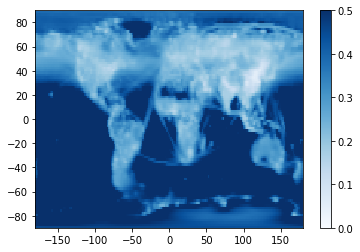

In [9]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
#data_land = data_land[data_land['P2_frac'] <1]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P2_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [10]:
data_mean['P2_frac'].describe()

count    16200.000000
mean         0.432036
std          0.166536
min          0.048121
25%          0.282138
50%          0.419678
75%          0.586228
max          0.778404
Name: P2_frac, dtype: float64

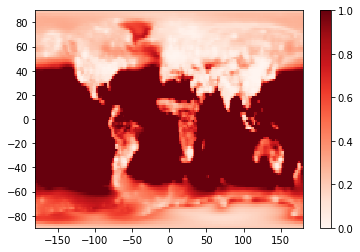

In [11]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
#data_land = data_land[data_land['latitude'] >= -60]
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Reds')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['ch3o2_mole']*10**(-8)
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=1, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [12]:
data['P3'] = data['o3prod_mole'] - data['P1'] - data['P2']
data['P3_frac'] = data['P3']/data['o3prod_mole']
data['P3_frac'].describe()

count    972000.000000
mean          0.230455
std           0.223888
min          -1.210605
25%           0.118893
50%           0.259786
75%           0.353385
max           0.947497
Name: P3_frac, dtype: float64

In [13]:
data['P5'] = data['k_o3_oh']*data['o3_mole']*data['oh_mole']
data['P5_frac'] = data['P5']/data['o3loss_mole']

In [14]:
data['P6'] = data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']
data['P6_frac'] = data['P6']/data['o3loss_mole']

In [15]:
data['ratio_P1_P2'] = data['P1']/data['P2']
data['ratio_P1_P2'].describe()

count    972000.000000
mean          1.131195
std           1.647566
min           0.005174
25%           0.423919
50%           0.766874
75%           1.414766
max         109.068042
Name: ratio_P1_P2, dtype: float64

In [16]:
data['ratio_P5_P6'] = data['P5']/data['P6']
data['ratio_P5_P6'].describe()

count    972000.000000
mean          1.615124
std           5.021530
min           0.050020
25%           0.199812
50%           0.321633
75%           0.810930
max         140.430823
Name: ratio_P5_P6, dtype: float64

In [17]:
data = data.drop(['a','b','c','country_y'], axis=1)
data = data.rename(columns={'country_x':'country'})
data

,longitude,latitude,t,loc,o3,o3prod,o3loss,eminox,emivoc,tas,...,P2,P2_frac,P3,P3_frac,P5,P5_frac,P6,P6_frac,ratio_P1_P2,ratio_P5_P6
0,1.0,-89.0,1.0,911.0,1.881623e-08,1.151662e-13,1.267580e-13,0.000000e+00,0.000000e+00,250.29199,...,49742.620818,0.717237,-27152.294248,-0.391508,24996.542752,0.327464,50748.033671,0.664818,0.940094,0.492562
1,3.0,-89.0,1.0,2911.0,1.881521e-08,1.150717e-13,1.264709e-13,0.000000e+00,0.000000e+00,250.12376,...,49652.920807,0.716532,-27163.947781,-0.391998,24979.686559,0.327986,50646.741889,0.664998,0.942688,0.493214
2,5.0,-89.0,1.0,4911.0,1.881329e-08,1.149488e-13,1.261420e-13,0.000000e+00,0.000000e+00,250.03404,...,49544.182762,0.715727,-27150.876771,-0.392228,24971.177333,0.328730,50569.765612,0.665718,0.945194,0.493797
3,7.0,-89.0,1.0,6911.0,1.881115e-08,1.147325e-13,1.257041e-13,0.000000e+00,0.000000e+00,249.96370,...,49389.075835,0.714832,-27094.958250,-0.392158,24942.973407,0.329502,50466.944558,0.666679,0.947533,0.494244
4,9.0,-89.0,1.0,8911.0,1.880953e-08,1.145785e-13,1.254009e-13,0.000000e+00,0.000000e+00,249.93759,...,49282.754968,0.714251,-27077.471311,-0.392432,24945.075911,0.330326,50415.292447,0.667607,0.949498,0.494792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971995,-9.0,89.0,60.0,-8911.0,4.140486e-08,3.237832e-16,9.027561e-16,1.136441e-13,2.367481e-16,254.84529,...,59.769258,0.306537,132.463105,0.679360,37.818907,0.069566,406.933908,0.748536,0.046009,0.092936
971996,-7.0,89.0,60.0,-6911.0,4.140422e-08,3.260785e-16,9.182633e-16,9.444109e-14,1.967354e-16,254.86888,...,60.072381,0.305923,133.544793,0.680086,38.442347,0.069519,414.121698,0.748893,0.045733,0.092829
971997,-5.0,89.0,60.0,-4911.0,4.140335e-08,2.955961e-16,8.787902e-16,2.331798e-17,0.000000e+00,254.89876,...,55.018317,0.309078,120.665833,0.677868,36.809164,0.069555,397.317576,0.750779,0.042238,0.092644
971998,-3.0,89.0,60.0,-2911.0,4.140186e-08,2.996158e-16,8.724657e-16,2.333118e-14,4.856588e-17,254.92984,...,55.888234,0.309753,122.114512,0.676802,36.449121,0.069374,394.101083,0.750099,0.043406,0.092487


In [18]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/CESM2-WACCM_diag_2014(0317).csv', index = False)

In [19]:
data_land = data.dropna()
ratio_P1_P2 = data_land['ratio_P1_P2'].median()
ratio_P5_P6 = data_land['ratio_P5_P6'].median()
P1_frac = data_land['P1_frac'].mean()
P2_frac = data_land['P2_frac'].mean()
P3_frac = data_land['P3_frac'].mean()
P5_frac = data_land['P5_frac'].mean()
P6_frac = data_land['P6_frac'].mean()
ratio_ho2_oh = data_land['ratio_ho2_oh'].median()
ratio_ch3o2_oh = data_land['ratio_ch3o2_oh'].median()

In [20]:
print("P1 fraction:    "+str(np.round(P1_frac,2)))
print("P2 fraction:    "+str(np.round(P2_frac,2)))
print("P3 fraction:    "+str(np.round(P3_frac,2)))
print("P5 fraction:    "+str(np.round(P5_frac,2)))
print("P6 fraction:    "+str(np.round(P6_frac,2)))
print("P1:P2 ratio:    "+str(np.round(ratio_P1_P2,2)))
print("P5:P6 ratio:    "+str(np.round(ratio_P5_P6,2)))
print("HO\u2082:OH ratio:   "+str(np.round(ratio_ho2_oh,1)))
print("CH\u2083O\u2082:OH ratio: "+str(np.round(ratio_ch3o2_oh,1)))

P1 fraction:    0.42
P2 fraction:    0.31
P3 fraction:    0.27
P5 fraction:    0.22
P6 fraction:    0.41
P1:P2 ratio:    1.4
P5:P6 ratio:    0.91
HO₂:OH ratio:   37.7
CH₃O₂:OH ratio: 23.8
